In [181]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

In [304]:
image_path = './cat.jpg'
image = Image.open(image_path)
true_label = [130,20,200,240]
predict_label = [110, 40, 190, 250]

In [305]:
def plot_rectangle(image, labels, label=None, color='k', facecolor='None'):
    x1,y1 = labels[0], labels[1]
    x2,y2 = labels[2], labels[3]
    plt.imshow(image)
    alpha = 0.3 if facecolor != 'None' else 1
    plt.gca().add_patch(Rectangle((x1,y1),x2,y2,linewidth=2, edgecolor=color,facecolor=facecolor , alpha=alpha))
    plt.text(x2, y1-4, s=label, fontsize=14, color=color)
    plt.axis('off');

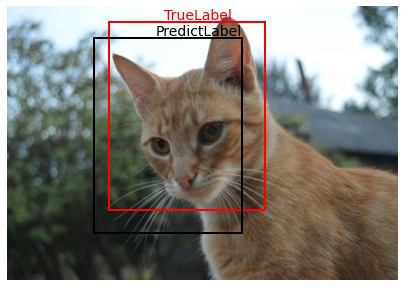

In [306]:
plt.figure(figsize=(7,7))
plot_rectangle(image, true_label,'TrueLabel','r')
plot_rectangle(image, predict_label, 'PredictLabel','k')

### Want to get a score from prediction --> Intersection over Union (IoU)

In [315]:
# Intersect area / Union area
def IoU(boxes_true, boxes_pred) :
    assert type(boxes_true) == type(boxes_pred)
    # [x1,y1,x2,y] 2 top left corner and bottom right corner points
    
    b1_x1 = boxes_pred[0]
    b1_y1 = boxes_pred[1]
    b1_x2 = boxes_pred[2]
    b1_y2 = boxes_pred[3]

    b2_x1 = boxes_true[0]
    b2_y1 = boxes_true[1]
    b2_x2 = boxes_true[2]
    b2_y2 = boxes_true[3]

    x1 = max(b1_x1, b2_x1)
    y1 = max(b1_y1, b2_y1)
    x2 = min(b1_y2, b1_x2)
    y2 = min(b2_y2, b1_y2)

    intersectArea = max(0, (x2-x1)) * max(0, (y2-y1)) # if x1-x2 < 0
    b1Area = abs((b1_x2-b1_x1) * (b1_y2-b1_y1))
    b2Area = abs((b2_x2-b2_x1) * (b2_y2-b2_y1))
    iou = intersectArea / (b1Area + b2Area - intersectArea)
    return iou, [x1, y1, x2, y2]

In [316]:
iouScore, intersectPoint = IoU(true_label, predict_label)
iouScore, intersectPoint

(0.594059405940594, [130, 40, 190, 240])

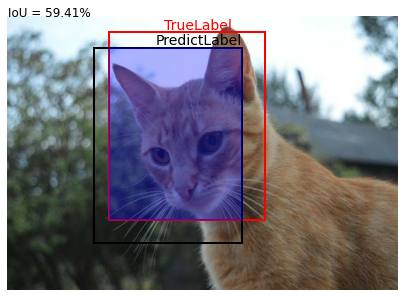

In [314]:
plt.figure(figsize=(7,7))
plot_rectangle(image, true_label,'TrueLabel','r' )
plot_rectangle(image, predict_label, 'PredictLabel','k')
plot_rectangle(image, intersectPoint , color='b', facecolor='b')
plt.text(0,0,f'IoU = {iouScore*100:.2f}%', fontsize=12);